In [91]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import math 

In [ ]:
vcf Chr1:9001000..9002000

In [ ]:
8999999

In [80]:
import pysam

# Open FASTA and VCF files
fasta_file = pysam.FastaFile("referencevcf3.fasta")
vcf_file = pysam.VariantFile("test.vcf")

# Count number of positions in FASTA and VCF files
num_positions_fasta = sum([len(fasta_file[contig]) for contig in fasta_file.references])
num_positions_vcf = sum([1 for record in vcf_file])

print(num_positions_fasta)
print(num_positions_vcf)

8001

8001

In [54]:
import pysam

# Open the VCF and FASTA files
vcf_file = pysam.VariantFile("test.vcf")
fasta_file = pysam.FastaFile("test.fasta")

In [55]:
print(list((vcf_file.header.contigs)))

['1', '2', '3', '4', '5']


In [56]:
8999999

8999999

In [83]:
fasta_file.references

['Chr1:9001000-9009000']

In [58]:
fasta_file.lengths

[8000]

In [41]:


# Check if the chromosome names and lengths are the same in both files
if vcf_file.references != fasta_file.references:
    print("Error: chromosome names in VCF file do not match chromosome names in FASTA file")
    exit()
if vcf_file.header.contigs != fasta_file.lengths:
    print("Error: chromosome lengths in VCF file do not match chromosome lengths in FASTA file")
    exit()

# Get the genomic coordinates for chromosome 1
chromosome_name = "Chr1"
chromosome_length = fasta_file.get_reference_length(chromosome_name)
vcf_positions = set()
for record in vcf_file.fetch(chromosome_name, 0, chromosome_length):
    vcf_positions.add(record.pos)
fasta_positions = set(range(0, chromosome_length))

# Check if the VCF and FASTA files cover the same positions for chromosome 1
if vcf_positions != fasta_positions:
    print("Error: VCF and FASTA files do not cover the same positions for chromosome 1")
    exit()

print("VCF and FASTA files cover the same positions for chromosome 1")


AttributeError: 'pysam.libcbcf.VariantFile' object has no attribute 'references'

In [37]:
fasta_file.references  # 9.001.000

['Chr1:9002000-9006000']

In [38]:
num_positions_fasta

4000

In [39]:
num_positions_vcf

6001

In [ ]:
9001000 10001001


In [29]:
num_positions_fasta

1000001

In [48]:
positions = []

In [83]:
for rec in vcf_file.fetch():
    positions.append(rec.pos)

In [51]:
9.000.999 in positions

False

In [ ]:
9 001 000 

In [69]:
9001000 in positions

True

In [81]:
pos_series

0           9001000
1           9001001
2           9001002
3           9001003
4           9001004
             ...   
999996     10000996
999997     10000997
999998     10000998
999999     10000999
1000000    10001000
Length: 1000001, dtype: int64

In [80]:
pos_series[pos_series.isin([9001000, 9001001,9001005])]

0    9001000
1    9001001
5    9001005
dtype: int64

In [75]:
positions.filter(9001000)

AttributeError: 'list' object has no attribute 'filter'

In [ ]:
first: 9001000  last 10001000

In [62]:
len(positions)

1000001

In [76]:
pos_series = pd.Series(positions)

In [61]:
pd.Series(positions).max()

10001000

In [33]:
num_positions_vcf

1000001

In [82]:
for record in vcf_file:
    print(record)

In [43]:
[record for record in vcf_file]

[]

In [6]:
import fwdpy11 as fp
import pyslim

In [ ]:
http://localhost:8888/?token=adf48011db5035700d1434bb9906f59a473c540ee46f054a

In [19]:
ts

In [18]:
import tskit, pyslim 
import numpy as np 
ts = tskit.load("recipe_nucleotides.trees") 
M = [[0 for _ in pyslim.NUCLEOTIDES] for _ in pyslim.NUCLEOTIDES] 
for mut in ts.mutations(): 
    mut_list = mut.metadata["mutation_list"] 
    k = np.argmax([u["slim_time"] for u in mut_list]) 
    derived_nuc = mut_list[k]["nucleotide"] 
    if mut.parent == -1: 
        acgt = ts.reference_sequence.data[int(ts.site(mut.site).position)]          
        parent_nuc = pyslim.NUCLEOTIDES.index(acgt) 
    else: 
        parent_mut = ts.mutation(mut.parent) 
        assert(parent_mut.site == mut.site) 
        parent_nuc = parent_mut.metadata["mutation_list"][0]["nucleotide"]      
    M[parent_nuc][derived_nuc] += 1
print("{}\t{}\t{}".format('ancestral', 'derived', 'count')) 
for j, a in enumerate(pyslim.NUCLEOTIDES): 
    for k, b in enumerate(pyslim.NUCLEOTIDES): 
        print("{}\t{}\t{}".format(a, b, M[j][k]))

ancestral	derived	count
A	A	0
A	C	603
A	G	632
A	T	587
C	A	638
C	C	0
C	G	653
C	T	623
G	A	621
G	C	631
G	G	0
G	T	662
T	A	635
T	C	656
T	G	635
T	T	0


In [4]:
# Define the mutation rates, effective population size, and length of the genome
mu = 1.2e-8
theta = 4*mu*1e4
Ne = 1e4
L = 10000

# Set the file path
vcf_file = "col0.vcf"

# Load the variants from the VCF file
with fp.VariantFile(vcf_file) as f:
    for variant in f:
        print(variant.position)


AttributeError: module 'fwdpy11' has no attribute 'VariantFile'

In [5]:
import fwdpy11 as fp
from fwdpy11 import vcfio

# Set simulation parameters
N = 10000
L = 10000

# Load the variants from the VCF file
vcf_file = vcfio.VariantFile("col0.vcf")
variants = list(vcf_file)

ImportError: cannot import name 'vcfio' from 'fwdpy11' (/Users/tbellagio/opt/anaconda3/envs/simulations/lib/python3.10/site-packages/fwdpy11/__init__.py)

In [ ]:

# Define the mutation model using the variants
mutation_model = fp.ExpS(1.0/L, 1.0/L, 0.0)

# Define the population size
pop = fp.SlocusPop(Ne, mutation_model, 2*L)

# Initialize the population with variants from the VCF file
fp.initialize_from_vcf(pop, variants, L)

# Define the simulation parameters
rng = fp.GSLrng(101)
Ngen = 100
s = 0.1
replicate = 1

# Run the simulation
for gen in range(Ngen):
    pop.evolve(rng, Ne, s)
    if gen % 10 == 0:
        print("Generation", gen)

# Print some statistics
print("Final number of variants:", pop.generation_stats["n"])
print("Final mean heterozygosity:", pop.generation_stats["h"])


In [2]:
## testing the api from 1001 genome project
import requests
url = 'https://tools.1001genomes.org/api/v1/vcfsubset/strains/9998,9999/gids/AT1G01070.1,AT1G01070.2/type/fullgenome/format/vcf'


In [3]:
req = requests.get(url)

In [4]:
req

<Response [200]>

In [6]:
req.headers

{'Date': 'Wed, 08 Mar 2023 18:00:36 GMT', 'Server': 'Apache/2.4.29 (Ubuntu)', 'Access-Control-Allow-Origin': '*', 'Content-Disposition': 'attachment; filename="9998,9999_1:38752-40944,1:38752-40927_fullgenome.vcf"', 'Strict-Transport-Security': 'max-age=15552000; includeSubdomains;', 'Vary': 'User-Agent', 'Keep-Alive': 'timeout=5, max=100', 'Connection': 'Keep-Alive', 'Transfer-Encoding': 'chunked', 'Content-Type': 'text/x-vcard; charset=utf-8'}

In [7]:
open('test.txt', 'wb').write(req.content)

278139

In [106]:
ecotypes_grenenet = pd.read_csv('/Users/tbellagio/safedata/ath_evo/grenephase1/data/ecotypes_data.csv')

In [107]:
ecotypes_grenenet = ecotypes_grenenet[ecotypes_grenenet['source'] == '1001G']

In [73]:
##find the ecotypes used in grenenet 
ecotypes_grenenet = pd.read_csv('/Users/tbellagio/safedata/ath_evo/grenephase1/data/ecotypes_data.csv') #['ecotypeid']
ecotypes_grenenet = ecotypes_grenenet[ecotypes_grenenet['source'] == '1001G']['ecotypeid']
#/Users/tbellagio/safedata/ath_evo/grenephase1/data

In [109]:
ecotypes_grenenet

,ecotypeid,source,longitude,latitude,csnumber,name,country,weightmasterseed,estimatedseednumber,seedsperplot
0,159,1001G,3.93333,47.3500,CS77070,MAR2-3,France,0.3004,16638,17.331250
1,265,1001G,-1.16667,44.6500,CS77198,PYL-6,France,0.3250,18000,18.750000
2,763,1001G,74.36670,42.3000,CS76522,Kar-1,Kyrgyzstan,0.1827,10119,10.540625
3,765,1001G,73.40000,42.1833,CS76607,Sus-1,Kyrgyzstan,0.2994,16582,17.272917
4,766,1001G,73.63330,42.5833,CS76473,Dja-1,Kyrgyzstan,0.3004,16638,17.331250
...,...,...,...,...,...,...,...,...,...,...
224,10002,1001G,9.04000,48.5300,CS76405,TueWa1-2,Germany,0.2338,12949,13.488542
225,10006,1001G,34.38140,44.6419,CS76395,Kastel-1,Ukraine,0.3075,17031,17.740625
226,10011,1001G,45.36220,39.8692,CS76394,Yeg-1,Armenia,0.0489,2708,2.820833
227,10013,1001G,48.61310,38.7406,CS76388,Lerik1-3,Azerbaijan,0.1704,9438,9.831250


In [110]:
ecotypes_grenenet = ecotypes_grenenet['ecotypeid'].tolist()

In [113]:
with open('ecotypes_grenenet.txt', 'w') as file:
    file.write('\n'.join(str(ecotypes) for ecotypes in ecotypes_grenenet))
    

In [50]:
ecotypes = str(lines).replace('[\'', '').replace('\']', '').replace(' ', '')


In [55]:
type(ecotypes)

str

In [57]:
ecotypes.replace(' ', '')

'159,265,763,765,766,768,772,5151,5165,5768,5772,5784,5811,6013,6025,6040,6073,6074,6108,6150,6177,6180,6184,6188,6195,6209,6216,6243,6244,6898,6911,6915,6929,6932,6938,6939,6940,6945,6958,6961,6963,6979,6987,7000,7002,7003,7008,7013,7025,7028,7031,7036,7062,7063,7067,7071,7077,7092,7103,7106,7125,7126,7127,7143,7164,7165,7186,7203,7209,7217,7218,7244,7255,7268,7273,7276,7282,7287,7288,7296,7298,7316,7323,7333,7346,7347,7353,7372,7378,7384,7394,7404,7411,7521,8214,8230,8231,8240,8247,8249,8311,8312,8351,8354,8357,8376,8387,9057,9058,9323,9371,9394,9416,9427,9470,9481,9506,9507,9510,9512,9517,9518,9521,9522,9523,9524,9526,9527,9528,9529,9534,9535,9537,9539,9542,9544,9547,9548,9549,9555,9557,9559,9560,9562,9564,9565,9574,9577,9579,9584,9586,9587,9591,9594,9595,9596,9597,9598,9600,9602,9606,9612,9619,9625,9629,9632,9634,9637,9640,9643,9649,9653,9657,9659,9697,9698,9699,9713,9716,9719,9723,9726,9736,9737,9739,9741,9743,9748,9749,9758,9759,9761,9764,9766,9769,9774,9775,9779,9781,9782,9784,9

In [90]:
len(pd.read_csv('ecotpyes_cluster_vcf.txt', sep= '/n'))

/var/folders/c7/0sb823gx22x79fkn0_lcmmqw0000gn/T/ipykernel_97014/1215055019.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  len(pd.read_csv('ecotpyes_cluster_vcf.txt', sep= '/n'))


1134

In [3]:
import pandas as pd

In [5]:
pd.read_csv('/Users/tbellagio/Documents/grenephase1/scratch_tati/simulations/moi_slim/BC_Map_environments.14x14.txt', header=None)

,0
0,-7
1,-4
2,1
3,-2
4,1
...,...
191,2
192,4
193,7
194,7


In [1]:
!pwd

/Users/tbellagio/Documents/grenephase1/scratch_tati/simulations


In [6]:
14 * 14

196

In [ ]:
fitnessScaling = 1.5 - (phenotypes - 10.0)^2 * 0.005; 

In [ ]:
fitnessScaling = 1.5 - (phenotypes - 10.0)^2 * 0.005; 

In [ ]:
fitnessEffect() { 
 phenotype = sum(individual.genomes.countOfMutationsOfType(m2)); 
 //print(individual.genomes.countOfMutationsOfType(m2));
 //print('hola');
 //print(phenotype);
 //print(1.5 - (phenotype - 10.0)^2 * 0.005);
 return 1.5 - (phenotype - 10.0)^2 * 0.005; b

In [7]:
sqrt(196)

NameError: name 'sqrt' is not defined

In [9]:
14 * 14


196

In [10]:
4 * 4


16

In [ ]:
1.5 - (phenotypes - inds.subpopulation.tag)^2 * 0.005; 

In [12]:
1.5 - ((0 - 2)**2) * 0.005

1.48

In [14]:
phenotypes = 0
indssubpopulationtag = -7

In [17]:
1.5 - (phenotypes - indssubpopulationtag)**2 * 0.005

1.255

In [105]:
mu, sigma = 0.1, 2 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)

In [106]:
phenotype = sum(s)

In [107]:
phenotype

6.2749877549440045

In [108]:
np.exp(-0.5 * (phenotype - 3)**2)

0.0046878913765051105

21.264550984034315

<AxesSubplot:ylabel='Count'>

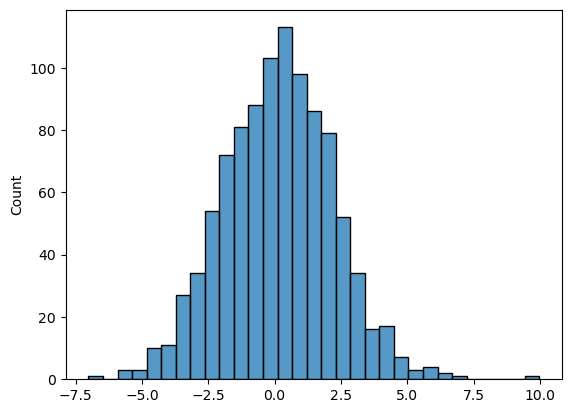

In [84]:
sns.histplot(s)

In [419]:
mu, sigma = 0, 4 # mean and standard deviation
s = np.random.normal(mu, sigma, 16)

In [420]:
s

array([-2.84728646, -7.20876196, -5.37404373, -3.05957445, -7.23467007,
       -3.54623151,  1.10476636, -3.02757584,  0.3501178 , -5.83005607,
       -3.94292278, -1.92356415, -6.7358435 , -0.91369091, -2.86572204,
        3.2266286 ])

<AxesSubplot:ylabel='Count'>

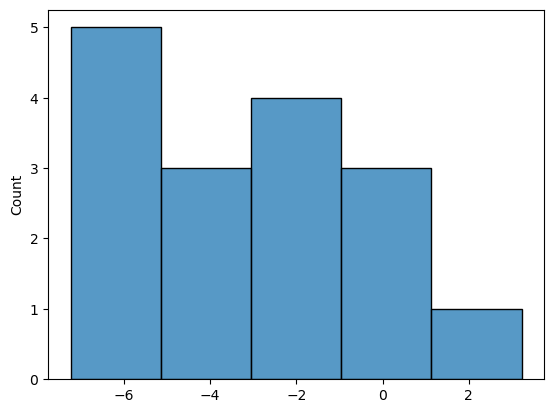

In [421]:
sns.histplot(s)

In [ ]:
## phenotypes will be the sum of random mutations taken from a normal with mu, sigma = 0.1, 0.01
mu, sigma = 0.1, 0.01 # mean and standard deviation
s = np.random.normal(mu, sigma, )

In [45]:
# uniform mutation rate of  1e-7 (per base position per gamete) across the whole chromosome.
#initializeMutationRate(1e-8) probabilidad de mutation de una base por gameta por cromosoma

#Number of mutations = Mutation rate × Length of DNA sequence × Time period

1e-8 * 1000000 * 23



0.23

In [46]:
qtls = '0.0 0.0 0.0 0.0 0.00179957 0.0 0.0 0.0 0.0 0.0 0.0 3.35447e-26 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 2.14615e-13 0.0 1.4013e-45 0.0 0.0 3.35447e-26 0.0 0.0 0.0 0.00179957 4.38608e-30 0.0 0.00179957 0.00179957 0.0 0.0 0.0 0.0 0.0 0.0 2.14615e-13 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 6.65165e-09 1.4013e-45 3.35447e-26 0.00179957 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.00179957 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.00179957 0.0 0.0 0.0 0.0 1.4013e-45 0.00179957 0.0 0.0 0.0 0.0 4.38608e-30 0.0 0.0 0.0'

In [47]:
qtls = qtls.replace(' ', ',')

'0.0,0.0,0.0,0.0,0.00179957,0.0,0.0,0.0,0.0,0.0,0.0,3.35447e-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.14615e-13,0.0,1.4013e-45,0.0,0.0,3.35447e-26,0.0,0.0,0.0,0.00179957,4.38608e-30,0.0,0.00179957,0.00179957,0.0,0.0,0.0,0.0,0.0,0.0,2.14615e-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.65165e-09,1.4013e-45,3.35447e-26,0.00179957,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00179957,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00179957,0.0,0.0,0.0,0.0,1.4013e-45,0.00179957,0.0,0.0,0.0,0.0,4.38608e-30,0.0,0.0,0.0'

In [61]:
## phenotypes are basically the sum of different effect sizes 

phenotypes = np.array([0.0,0.0,0.0,0.0,0.00179957,0.0,0.0,0.0,0.0,0.0,0.0,3.35447e-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.14615e-13,0.0,1.4013e-45,0.0,0.0,3.35447e-26,0.0,0.0,0.0,0.00179957,4.38608e-30,0.0,0.00179957,0.00179957,0.0,0.0,0.0,0.0,0.0,0.0,2.14615e-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.65165e-09,1.4013e-45,3.35447e-26,0.00179957,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00179957,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00179957,0.0,0.0,0.0,0.0,1.4013e-45,0.00179957,0.0,0.0,0.0,0.0,4.38608e-30,0.0,0.0,0.0])

In [ ]:
Fitness = exp(-0.5 * (phenotype - optimum)^2 / sigma^2)
Fitness = exp(-0.5 * (phenotype - optimum)^2)

## what i was using 
inds.fitnessScaling = 1.5 - (phenotypes - inds.subpopulation.tag)^2 * 0.005; 


In [ ]:
inds.fitnessScaling = 1.5 - (phenotypes - inds.subpopulation.tag)^2 * 0.005; 


In [66]:
fitness = np.exp(-0.5 * (phenotypes - 2) ** 2)


In [67]:
fitness

array([0.13533528, 0.13533528, 0.13533528, 0.13533528, 0.13582303,
       0.13533528, 0.13533528, 0.13533528, 0.13533528, 0.13533528,
       0.13533528, 0.13533528, 0.13533528, 0.13533528, 0.13533528,
       0.13533528, 0.13533528, 0.13533528, 0.13533528, 0.13533528,
       0.13533528, 0.13533528, 0.13533528, 0.13533528, 0.13533528,
       0.13533528, 0.13533528, 0.13533528, 0.13533528, 0.13582303,
       0.13533528, 0.13533528, 0.13582303, 0.13582303, 0.13533528,
       0.13533528, 0.13533528, 0.13533528, 0.13533528, 0.13533528,
       0.13533528, 0.13533528, 0.13533528, 0.13533528, 0.13533528,
       0.13533528, 0.13533528, 0.13533528, 0.13533528, 0.13533528,
       0.13533528, 0.13533528, 0.13533528, 0.13533529, 0.13533528,
       0.13533528, 0.13582303, 0.13533528, 0.13533528, 0.13533528,
       0.13533528, 0.13533528, 0.13533528, 0.13533528, 0.13533528,
       0.13533528, 0.13533528, 0.13533528, 0.13533528, 0.13533528,
       0.13533528, 0.13533528, 0.13533528, 0.13533528, 0.13533

In [ ]:
def calculate_fitness(phenotype, optimum, sigma):
    exponent = 
    fitness = 
    return fitness

In [79]:


#define x-axis values
x = np.linspace (0, 40, 100) 

#calculate pdf of Gamma distribution for each x-value
y = stats.gamma.pdf(x, a=5, scale=3)


In [81]:
x

array([ 0.        ,  0.4040404 ,  0.80808081,  1.21212121,  1.61616162,
        2.02020202,  2.42424242,  2.82828283,  3.23232323,  3.63636364,
        4.04040404,  4.44444444,  4.84848485,  5.25252525,  5.65656566,
        6.06060606,  6.46464646,  6.86868687,  7.27272727,  7.67676768,
        8.08080808,  8.48484848,  8.88888889,  9.29292929,  9.6969697 ,
       10.1010101 , 10.50505051, 10.90909091, 11.31313131, 11.71717172,
       12.12121212, 12.52525253, 12.92929293, 13.33333333, 13.73737374,
       14.14141414, 14.54545455, 14.94949495, 15.35353535, 15.75757576,
       16.16161616, 16.56565657, 16.96969697, 17.37373737, 17.77777778,
       18.18181818, 18.58585859, 18.98989899, 19.39393939, 19.7979798 ,
       20.2020202 , 20.60606061, 21.01010101, 21.41414141, 21.81818182,
       22.22222222, 22.62626263, 23.03030303, 23.43434343, 23.83838384,
       24.24242424, 24.64646465, 25.05050505, 25.45454545, 25.85858586,
       26.26262626, 26.66666667, 27.07070707, 27.47474747, 27.87

/Users/tbellagio/opt/anaconda3/envs/simulations/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


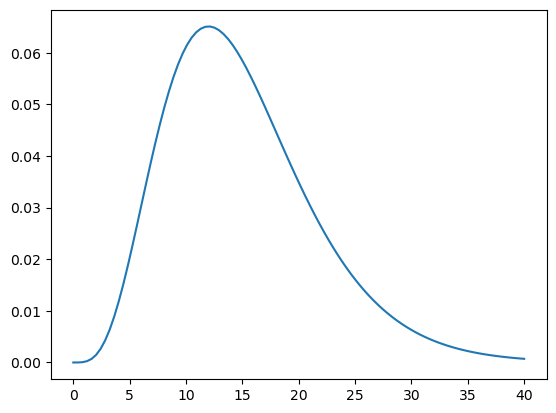

In [80]:
sns.lineplot(x,y);

In [111]:
1969055 * 0.001

1969.055

In [113]:
19681/4

4920.25

In [114]:
4920 + 4920

9840

In [116]:
14760 + 4209

18969

In [117]:
18969 + 4209

23178

In [125]:
4920 * 0.1

492.0

In [126]:
4920 * 0.9

4428.0

Create fasta files from vcf files code 

In [ ]:
import allel


In [178]:
#vcf.keys()
vcf = allel.read_vcf('outputs/subp0.vcf', samples=['i0'])
gt = vcf['calldata/GT']
ref = vcf['variants/REF']
alt = vcf['variants/ALT']

## checking that all the values in the second column are empty 
np.all(alt[:, 1] == '')
## checking that all the values in the third column are empty 
np.all(alt[:, 2] == '')
## so i will only keep the ones in the first column 
alt = alt[:, 0] 
first_chr = gt[:, 0, 0]
second_chr = gt[:, 0, 1]

# Retrieve the reference sequence for the genomic region covered by the VCF file
chrom = vcf['variants/CHROM'][0]
start = vcf['variants/POS'][0]
end = vcf['variants/POS'][-1]
# Convert the genotype information to a nucleotide sequence
seq_firstchr = ''
for i in range(0, len(first_chr)):
    if first_chr[i] == 0:
        seq_firstchr += ref[i]
    else:
        seq_firstchr += alt[i]
seq_firstchr
with open(f'{sample}.fasta', 'w') as f:
    f.write(f'>{chrom}:{start}-{end}\n')
    f.write(seq_firstchr + '\n')


In [ ]:
## make a loop to create a fasta file for all the individuals in one population

In [316]:
vcf = allel.read_vcf('vcf_slim/subp0.vcf')

In [318]:
samples = vcf['samples']

In [330]:
#vcf.keys()
## will just do it for 20 
for individual in samples[:20]: 
    print(individual)
    vcf = allel.read_vcf('vcf_slim/subp0.vcf', samples=[individual])
    gt = vcf['calldata/GT']
    ref = vcf['variants/REF']
    alt = vcf['variants/ALT']

    ## i will only keep the ones in the first column for the alt 
    alt = alt[:, 0] 
    first_chr = gt[:, 0, 0]
    second_chr = gt[:, 0, 1]

    # Retrieve the reference sequence for the genomic region covered by the VCF file

    ## here i will have to pretend that each organisms is a chromosome 
    #chrom = vcf['variants/CHROM'][0]
    start = vcf['variants/POS'][0]
    end = vcf['variants/POS'][-1]
    # Convert the genotype information to a nucleotide sequence
    seq_firstchr = ''
    for i in range(0, len(first_chr)):
        if first_chr[i] == 0:
            seq_firstchr += ref[i]
        else:
            seq_firstchr += alt[i]
    seq_firstchr
    with open(f'vcf_slim/fasta_slim/subp0.fasta', 'a') as f:
        f.write(f'>{individual}:{start}-{end}\n')
        f.write(seq_firstchr + '\n')

i0
i1
i2
i3
i4
i5
i6
i7
i8
i9
i10
i11
i12
i13
i14
i15
i16
i17
i18
i19


In [312]:
## find heterocygous sites with scikit allele

In [313]:
callset = allel.read_vcf('outputs/subp0.vcf') #, samples=['i0'])

FileNotFoundError: [Errno 2] No such file or directory: 'outputs/subp0.vcf'

In [ ]:

# Get genotype array
gt = allel.GenotypeArray(callset['calldata/GT'])


In [ ]:
gt.is_het()


array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [ ]:
## number of heterozigous per position in my simulation 
len(gt.count_het(axis=1))
het_per_pos = gt.count_het(axis=1)

<AxesSubplot:ylabel='Count'>

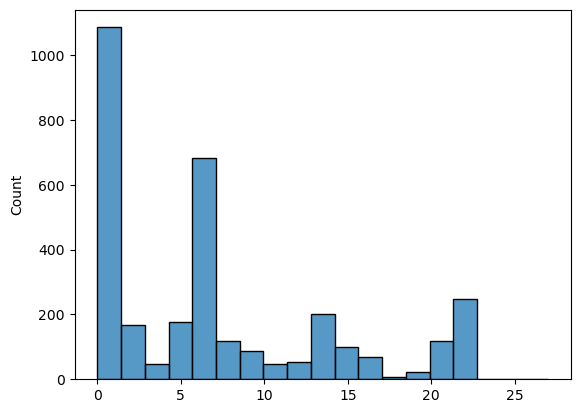

In [ ]:
sns.histplot(het_per_pos)

In [333]:
### how to relate the fitness and the number of offspring 


from scipy.stats import poisson

#generate random values from Poisson distribution with mean=3 and sample size=10
v = poisson.rvs(mu=2, size=1)

In [354]:
fitness = np.array(fitness)

In [356]:
fitness * 10

array([12.6966 , 10.6575 , 10.0849 , 14.9224 ,  7.79436, 16.1183 ,
       14.5854 , 12.1587 , 13.5396 , 12.258  , 11.8517 , 13.1451 ,
       11.5364 , 13.3351 , 11.1018 , 11.2782 , 12.6917 , 18.8412 ,
       10.6595 , 12.3677 , 10.1509 , 11.3001 , 12.6499 ,  9.05024,
       11.1095 , 10.5936 , 12.109  , 12.5418 , 11.5789 , 11.4319 ,
       13.3566 , 13.9941 , 12.6608 , 18.8412 , 15.1431 , 11.5578 ,
       13.5802 , 11.5743 , 11.4843 , 11.7558 , 11.4587 , 11.347  ,
       14.103  , 12.3669 , 10.7956 ,  8.08025, 10.4121 , 14.403  ,
       18.2383 , 12.4161 , 11.6155 , 10.3975 , 13.1357 , 10.9732 ,
       11.7638 , 14.4976 ,  8.23244, 10.392  , 16.1054 , 14.2423 ,
        9.64468, 11.3949 , 14.0501 , 14.403  , 11.5897 , 16.697  ,
       12.5442 , 12.7203 , 17.7736 , 12.7009 , 12.5301 , 13.0964 ,
       12.358  ,  7.38602, 16.6074 , 12.0858 , 11.1043 , 12.1324 ,
       11.7557 , 12.6746 , 13.0154 , 14.0475 , 11.61   , 14.4674 ,
       11.7629 , 10.3121 , 12.2055 , 17.5894 , 14.7515 , 13.53

In [357]:
len(fitness)

189

In [358]:
np.ones(len(fitness))

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1.])

In [355]:
expected_offspring = fitness * 10
v = poisson.rvs(mu=expected_offspring, size=np.ones(len(fitness)))

ValueError: size does not match the broadcast shape of the parameters. 1, (1,), (189,)

<AxesSubplot:ylabel='Count'>

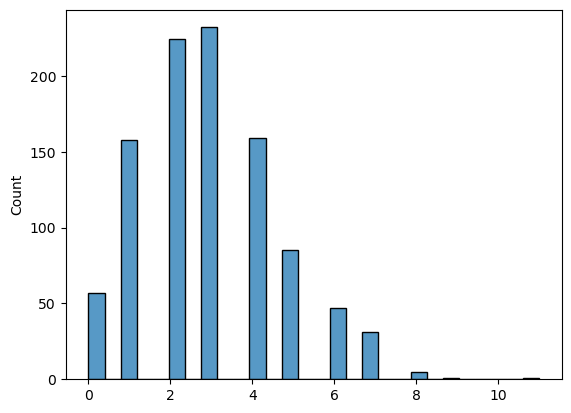

In [334]:
sns.histplot(v)

In [346]:
fitness = '1.26966 1.06575 1.00849 1.49224 0.779436 1.61183 1.45854 1.21587 1.35396 1.2258 1.18517 1.31451 1.15364 1.33351 1.11018 1.12782 1.26917 1.88412 1.06595 1.23677 1.01509 1.13001 1.26499 0.905024 1.11095 1.05936 1.2109 1.25418 1.15789 1.14319 1.33566 1.39941 1.26608 1.88412 1.51431 1.15578 1.35802 1.15743 1.14843 1.17558 1.14587 1.1347 1.4103 1.23669 1.07956 0.808025 1.04121 1.4403 1.82383 1.24161 1.16155 1.03975 1.31357 1.09732 1.17638 1.44976 0.823244 1.0392 1.61054 1.42423 0.964468 1.13949 1.40501 1.4403 1.15897 1.6697 1.25442 1.27203 1.77736 1.27009 1.25301 1.30964 1.2358 0.738602 1.66074 1.20858 1.11043 1.21324 1.17557 1.26746 1.30154 1.40475 1.161 1.44674 1.17629 1.03121 1.22055 1.75894 1.47515 1.35304 1.22787 0.899457 1.07057 1.04791 1.09732 1.02642 0.980694 1.20856 1.03479 0.928734 1.89947 1.45354 1.0969 1.14311 0.915521 1.20444 1.62971 0.901581 1.36597 1.12526 0.980423 1.21239 1.0295 1.2792 1.07736 1.30869 0.906049 1.65495 1.30964 1.14297 1.31095 1.19412 1.31422 1.19277 0.857881 0.969496 1.02173 0.975681 1.10846 1.41249 0.975464 1.2602 1.21592 1.17028 1.35322 1.23865 1.08306 1.10652 1.17499 0.98621 1.02743 1.48283 1.55649 1.19528 1.28064 1.37391 1.19368 1.21066 1.14881 1.62357 1.26326 1.28649 0.948908 0.930558 1.18129 1.20245 1.24181 1.22376 1.39955 1.11295 1.19615 1.49618 1.00399 1.46666 1.25771 1.41418 1.37535 1.15578 1.12974 1.25185 1.26608 1.04121 1.34051 1.7993 1.04009 1.68861 1.75661 1.07831 1.11626 1.35367 0.987845 1.1673 1.42507 1.15031 0.891522 1.2401 0.893997 0.950806 1.07208'

In [347]:
fitness = fitness.split(" ")

fitness = [eval(i) for i in fitness]

In [348]:
fitness

[1.26966,
 1.06575,
 1.00849,
 1.49224,
 0.779436,
 1.61183,
 1.45854,
 1.21587,
 1.35396,
 1.2258,
 1.18517,
 1.31451,
 1.15364,
 1.33351,
 1.11018,
 1.12782,
 1.26917,
 1.88412,
 1.06595,
 1.23677,
 1.01509,
 1.13001,
 1.26499,
 0.905024,
 1.11095,
 1.05936,
 1.2109,
 1.25418,
 1.15789,
 1.14319,
 1.33566,
 1.39941,
 1.26608,
 1.88412,
 1.51431,
 1.15578,
 1.35802,
 1.15743,
 1.14843,
 1.17558,
 1.14587,
 1.1347,
 1.4103,
 1.23669,
 1.07956,
 0.808025,
 1.04121,
 1.4403,
 1.82383,
 1.24161,
 1.16155,
 1.03975,
 1.31357,
 1.09732,
 1.17638,
 1.44976,
 0.823244,
 1.0392,
 1.61054,
 1.42423,
 0.964468,
 1.13949,
 1.40501,
 1.4403,
 1.15897,
 1.6697,
 1.25442,
 1.27203,
 1.77736,
 1.27009,
 1.25301,
 1.30964,
 1.2358,
 0.738602,
 1.66074,
 1.20858,
 1.11043,
 1.21324,
 1.17557,
 1.26746,
 1.30154,
 1.40475,
 1.161,
 1.44674,
 1.17629,
 1.03121,
 1.22055,
 1.75894,
 1.47515,
 1.35304,
 1.22787,
 0.899457,
 1.07057,
 1.04791,
 1.09732,
 1.02642,
 0.980694,
 1.20856,
 1.03479,
 0.928734,
 1

In [366]:
fitness

array([1.26966 , 1.06575 , 1.00849 , 1.49224 , 0.779436, 1.61183 ,
       1.45854 , 1.21587 , 1.35396 , 1.2258  , 1.18517 , 1.31451 ,
       1.15364 , 1.33351 , 1.11018 , 1.12782 , 1.26917 , 1.88412 ,
       1.06595 , 1.23677 , 1.01509 , 1.13001 , 1.26499 , 0.905024,
       1.11095 , 1.05936 , 1.2109  , 1.25418 , 1.15789 , 1.14319 ,
       1.33566 , 1.39941 , 1.26608 , 1.88412 , 1.51431 , 1.15578 ,
       1.35802 , 1.15743 , 1.14843 , 1.17558 , 1.14587 , 1.1347  ,
       1.4103  , 1.23669 , 1.07956 , 0.808025, 1.04121 , 1.4403  ,
       1.82383 , 1.24161 , 1.16155 , 1.03975 , 1.31357 , 1.09732 ,
       1.17638 , 1.44976 , 0.823244, 1.0392  , 1.61054 , 1.42423 ,
       0.964468, 1.13949 , 1.40501 , 1.4403  , 1.15897 , 1.6697  ,
       1.25442 , 1.27203 , 1.77736 , 1.27009 , 1.25301 , 1.30964 ,
       1.2358  , 0.738602, 1.66074 , 1.20858 , 1.11043 , 1.21324 ,
       1.17557 , 1.26746 , 1.30154 , 1.40475 , 1.161   , 1.44674 ,
       1.17629 , 1.03121 , 1.22055 , 1.75894 , 1.47515 , 1.353

In [395]:
import math
import numpy as np


log_transform = lambda x: math.log(x + 1.0) + 1.0
offspring_counts = np.exp(np.vectorize(log_transform)(fitness))


In [396]:
offspring_counts

array([6.16957553, 5.61529069, 5.45964187, 6.7746107 , 4.83700854,
       7.09969003, 6.68300461, 6.02335916, 6.39872669, 6.05035169,
       5.9399079 , 6.29149047, 5.85420048, 6.34313783, 5.73606395,
       5.78401444, 6.16824358, 7.83985099, 5.61583434, 6.08017125,
       5.47758253, 5.78996748, 6.15688116, 5.17839212, 5.73815703,
       5.59792087, 6.00984929, 6.12749653, 5.86575317, 5.82579443,
       6.34898214, 6.5222726 , 6.15984409, 7.83985099, 6.83460318,
       5.8600176 , 6.40976292, 5.86450277, 5.84003823, 5.91383958,
       5.83307943, 5.80271622, 6.55187469, 6.07995378, 5.65283016,
       4.9147215 , 5.54858405, 6.63342315, 7.67596578, 6.09332773,
       5.87570209, 5.54461536, 6.28893529, 5.70110684, 5.91601421,
       6.65913809, 4.95609103, 5.5431203 , 7.09618344, 6.58974036,
       5.33997767, 5.81573679, 6.53749498, 6.63342315, 5.86868892,
       7.256997  , 6.12814892, 6.17601786, 7.54964722, 6.1707444 ,
       6.12431614, 6.27825244, 6.07753451, 4.72601022, 7.23264

In [364]:
offspring = log_offspring_count(fitness)

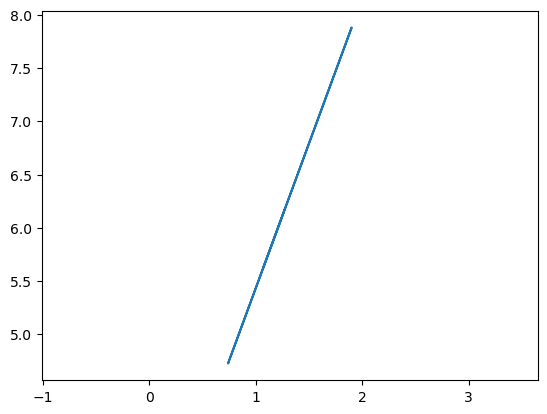

In [397]:
# plot data
plt.plot(fitness,  offspring_counts) # s controls point size

# add y=x line
#plt.plot([0,15],[0,15], color='#414242', linestyle='dashed')
plt.axis('equal')
plt.show()

In [367]:
math.log(fitness ) 

TypeError: only size-1 arrays can be converted to Python scalars

In [379]:
from matplotlib import pyplot as plt


In [386]:
fitness

array([1.26966 , 1.06575 , 1.00849 , 1.49224 , 0.779436, 1.61183 ,
       1.45854 , 1.21587 , 1.35396 , 1.2258  , 1.18517 , 1.31451 ,
       1.15364 , 1.33351 , 1.11018 , 1.12782 , 1.26917 , 1.88412 ,
       1.06595 , 1.23677 , 1.01509 , 1.13001 , 1.26499 , 0.905024,
       1.11095 , 1.05936 , 1.2109  , 1.25418 , 1.15789 , 1.14319 ,
       1.33566 , 1.39941 , 1.26608 , 1.88412 , 1.51431 , 1.15578 ,
       1.35802 , 1.15743 , 1.14843 , 1.17558 , 1.14587 , 1.1347  ,
       1.4103  , 1.23669 , 1.07956 , 0.808025, 1.04121 , 1.4403  ,
       1.82383 , 1.24161 , 1.16155 , 1.03975 , 1.31357 , 1.09732 ,
       1.17638 , 1.44976 , 0.823244, 1.0392  , 1.61054 , 1.42423 ,
       0.964468, 1.13949 , 1.40501 , 1.4403  , 1.15897 , 1.6697  ,
       1.25442 , 1.27203 , 1.77736 , 1.27009 , 1.25301 , 1.30964 ,
       1.2358  , 0.738602, 1.66074 , 1.20858 , 1.11043 , 1.21324 ,
       1.17557 , 1.26746 , 1.30154 , 1.40475 , 1.161   , 1.44674 ,
       1.17629 , 1.03121 , 1.22055 , 1.75894 , 1.47515 , 1.353

In [387]:
offspring = np.exp(np.vectorize(log_transform)(fitness))

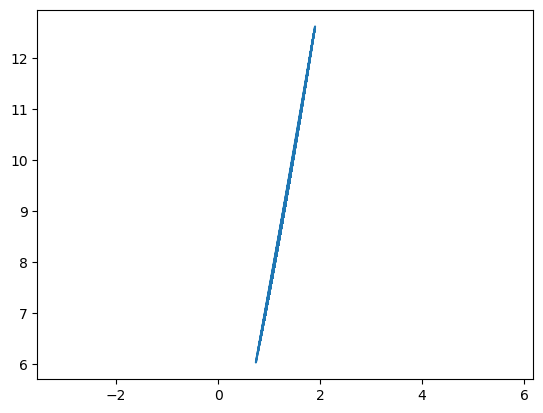

In [389]:
# plot data
plt.plot(fitness,  offspring) # s controls point size

# add y=x line
#plt.plot([0,15],[0,15], color='#414242', linestyle='dashed')
plt.axis('equal')
plt.show()

<AxesSubplot:ylabel='Count'>

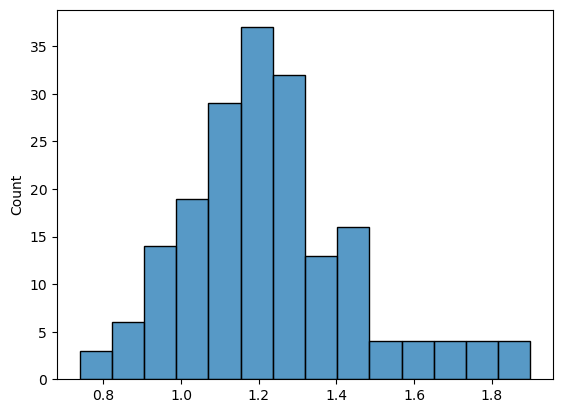

In [398]:
sns.histplot(fitness)

<AxesSubplot:ylabel='Count'>

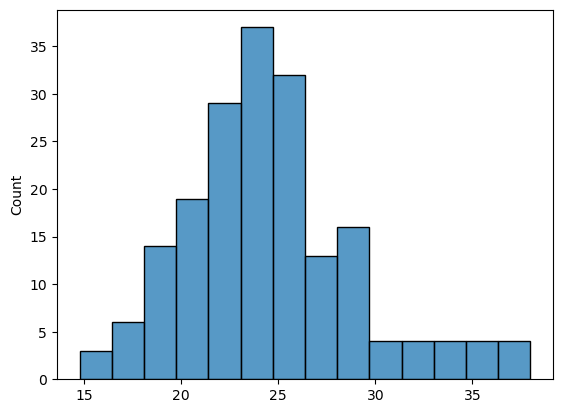

In [399]:
sns.histplot(fitness*20)

<AxesSubplot:ylabel='Count'>

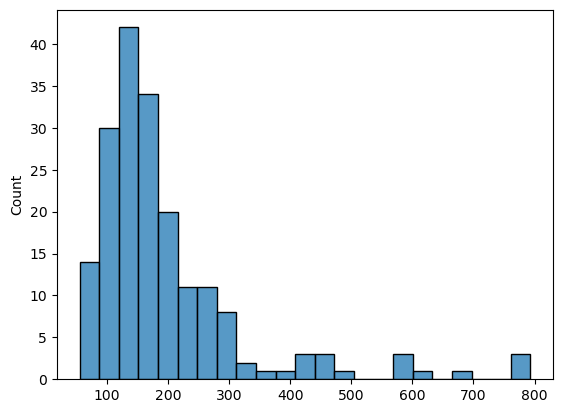

In [403]:
sns.histplot(10**fitness*10)

In [404]:
import numpy as np
from scipy.stats import truncnorm

# Define the parameters of the truncated normal distribution
a = (0 - 10) / 2  # Calculate the lower bound
b = (1000 - 10) / 2  # Calculate the upper bound
mean = 10  # Set the mean
std = 2  # Set the standard deviation

# Generate a random sample from the truncated normal distribution
sample_size = len(fitness)  # Set the sample size to match the length of the fitness vector
rvs = truncnorm.rvs(a, b, loc=mean, scale=std, size=sample_size)

# Scale the sample to match the fitness values
rvs = rvs * fitness / np.mean(rvs * fitness)

# Round the sample to the nearest integer
rvs = np.round(rvs).astype(int)

# Check the minimum and maximum values of the sample
print("Minimum value:", np.min(rvs))
print("Maximum value:", np.max(rvs))

Minimum value: 0
Maximum value: 2


In [406]:
rvs = truncnorm.rvs(a, b, loc=mean, scale=std, size=sample_size)

In [407]:
rvs

array([10.96688254, 11.12362516,  8.9536263 , 12.49498802,  4.94160395,
        7.57254474,  7.98318032,  7.4386589 , 10.27080984,  7.40156967,
       10.60213296, 10.10765367, 11.43950705, 10.02722437, 10.7116061 ,
        6.49581928, 10.36968218, 12.78807098, 12.21829987, 11.93901709,
       13.23336442, 11.88748388, 10.41451223,  8.49581234,  9.29905748,
       10.23787095,  7.07417571,  7.74614582,  7.40145727,  9.02562925,
       11.78566277, 11.59660347,  9.08783721, 13.01633231, 13.45970632,
       10.25882612, 10.85392421, 12.77408154, 10.4150795 ,  8.48491598,
        8.99995724,  9.6404104 ,  7.3603327 , 11.07936498, 13.52478128,
       11.3163983 , 11.27872962, 14.17982177, 11.2909923 ,  7.78937008,
        7.3977573 ,  8.22852779,  9.97658379, 11.28954546, 10.7129089 ,
       13.11351405, 11.50081641,  8.53094753,  7.06973435,  9.74941068,
       12.24456852,  8.91116129,  7.96327228,  9.04970488, 10.20656592,
       10.85562951, 10.89387964, 11.23499241, 13.62318282,  7.17

Here I will calculate the optima based on one individual for the contributing snps

In [449]:
import allel

# Load VCF file
## be careful remember this file has multiplied samples



vcf = allel.read_vcf('qtl1_contrib.vcf')


In [450]:
samples = vcf['samples'].astype(str)

In [451]:
symbol_indices = np.char.find(samples, ':')

In [447]:
samples_original = samples[symbol_indices == -1]


In [452]:
## now getting the filtered vcf file with one cotype each time 
vcf = allel.read_vcf('qtl1_contrib.vcf', samples=samples_original)

In [453]:
allel.GenotypeArray(vcf['calldata/GT'])

<GenotypeArray shape=(196, 225, 2) dtype=int8>
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
...
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0

In [480]:
## sanity ceck i should not see any heteroc variants
allel.GenotypeArray(vcf['calldata/GT']).is_het().sum(axis=1)

## mhmhm im seeing some heterocygos positions 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [464]:
alt_al_per_ecotype = allel.GenotypeArray(vcf['calldata/GT']).sum(axis=0).sum(axis=1)

In [465]:
alt_al_per_ecotype  ## so they actually all have some alterantive allele at the selected positions
## that are contributing to the qtl 

array([18,  8, 16, 18, 18, 20, 26,  8, 12,  8, 10, 22, 12, 20, 16, 12, 14,
       18, 12, 26, 22, 10, 18, 10, 18, 24, 24, 14, 26, 10, 24, 12, 18, 10,
       12, 16, 14, 12, 18, 22, 18, 14, 12, 16, 12, 14, 16, 18, 18, 18, 18,
       16, 16, 10, 22, 16, 12, 16, 18, 10, 20, 10, 22, 16, 14, 16, 14, 10,
        6, 10, 20, 10, 16, 10, 16,  6, 12, 16, 24, 12, 12, 22, 18, 22,  8,
       16, 18, 12, 16, 22, 12, 14, 20, 12, 18, 12, 10, 14, 16, 12, 16, 18,
       18, 21, 18, 14, 14, 20, 24, 14, 10, 20, 22, 16, 22, 22, 12, 14, 16,
       18, 14, 16, 18, 22, 18, 14, 18, 14, 14, 20, 22, 16, 18, 20, 10, 12,
       14, 22, 22, 22, 16, 16, 12, 18, 22, 21, 18, 20, 14, 12, 10, 20, 24,
       20, 20, 22, 26, 24, 28, 14, 12, 14, 14, 12, 11, 12, 10, 13, 14, 12,
       18, 16,  4, 14, 14, 12, 15, 12, 14, 16, 16, 12, 11, 14, 14, 18, 12,
       12, 18, 14, 14, 26, 14, 18, 18, 30, 22,  6, 14, 12, 16, 10, 16, 14,
       12, 16, 22, 32, 14, 14, 12, 18, 20, 22, 11, 18, 16,  8, 18, 20, 14,
       18, 10, 12, 14])

In [483]:
np.random.choice(samples_original, 1)

array(['9758'], dtype='<U7')

In [485]:
## 9758 
vcf = allel.read_vcf('qtl1_contrib.vcf', samples=['9758'])

In [488]:
effect_sizes = 'Mutation<0:0.164584> Mutation<1:0.124438> Mutation<2:-0.177748> Mutation<3:-0.0740522> Mutation<4:0.0422788> Mutation<5:0.00532756> Mutation<6:-0.0436742> Mutation<7:0.123559> Mutation<8:-0.0814933> Mutation<9:0.0417087> Mutation<10:-0.127904> Mutation<11:-0.157456> Mutation<12:-0.0527329> Mutation<13:-0.0997102> Mutation<14:0.135568> Mutation<15:-0.11157> Mutation<16:0.0610743> Mutation<17:0.0296972> Mutation<18:0.0153939> Mutation<19:-0.010162> Mutation<20:-0.0542467> Mutation<21:-0.0962193> Mutation<22:0.027491> Mutation<23:0.277699> Mutation<24:-0.0541863> Mutation<25:0.0185635> Mutation<26:-0.117581> Mutation<27:0.113231> Mutation<28:-0.0385288> Mutation<29:-0.0498746> Mutation<30:-0.111884> Mutation<31:-0.0319943> Mutation<32:-0.0365451> Mutation<33:-0.00304521> Mutation<34:-0.0310583> Mutation<35:0.099682> Mutation<36:-0.0110558> Mutation<37:0.04288> Mutation<38:-0.0463132> Mutation<39:0.0090556> Mutation<40:-0.100028> Mutation<41:-0.0356908> Mutation<42:0.0124471> Mutation<43:-0.0992094> Mutation<44:-0.0932425> Mutation<45:0.10824> Mutation<46:0.192339> Mutation<47:-0.0327466> Mutation<48:0.063873> Mutation<49:0.109288> Mutation<50:-0.0713757> Mutation<51:-0.117898> Mutation<52:0.10017> Mutation<53:-0.158185> Mutation<54:-0.104032> Mutation<55:0.0164632> Mutation<56:-0.0232567> Mutation<57:-0.0894403> Mutation<58:-0.0420252> Mutation<59:7.96414e-05> Mutation<60:-0.0872583> Mutation<61:0.00433959> Mutation<62:-0.0248883> Mutation<63:-0.0381848> Mutation<64:0.0090845> Mutation<65:-0.0345845> Mutation<66:0.248673> Mutation<67:0.0294632> Mutation<68:0.0202911> Mutation<69:0.198116> Mutation<70:-0.197909> Mutation<71:0.212226> Mutation<72:-0.00894741> Mutation<73:-0.124033> Mutation<74:-0.115829> Mutation<75:0.182913> Mutation<76:-0.0152041> Mutation<77:0.0166773> Mutation<78:0.0109096> Mutation<79:-0.0170778> Mutation<80:-0.0136941> Mutation<81:-0.0897287> Mutation<82:0.00141085> Mutation<83:-0.109294> Mutation<84:0.0116537> Mutation<85:0.0811803> Mutation<86:-0.063851> Mutation<87:-0.0466222> Mutation<88:0.0288402> Mutation<89:-0.0024095> Mutation<90:0.0819453> Mutation<91:-0.0301591> Mutation<92:0.0277244> Mutation<93:0.0542347> Mutation<94:0.0915827> Mutation<95:-0.0671199> Mutation<96:-0.0489883> Mutation<97:-0.183918> Mutation<98:0.0796153> Mutation<99:-0.0632539> Mutation<100:-0.156448> Mutation<101:-0.0778142> Mutation<102:-0.0164655> Mutation<103:0.0402324> Mutation<104:0.0625098> Mutation<105:0.0214965> Mutation<106:0.0455129> Mutation<107:-0.0586437> Mutation<108:-0.0187321> Mutation<109:-0.217464> Mutation<110:-0.0840918> Mutation<111:-0.00612382> Mutation<112:0.0367146> Mutation<113:0.0621314> Mutation<114:0.190795> Mutation<115:0.166697> Mutation<116:-0.159107> Mutation<117:0.146726> Mutation<118:0.0432925> Mutation<119:0.0935883> Mutation<120:-0.112078> Mutation<121:0.017154> Mutation<122:0.0685679> Mutation<123:0.004695> Mutation<124:-0.032471> Mutation<125:-0.0374844> Mutation<126:-0.0311432> Mutation<127:0.14745> Mutation<128:0.104512> Mutation<129:0.0631346> Mutation<130:-0.00435849> Mutation<131:0.0557941> Mutation<132:0.0958863> Mutation<133:-0.0772008> Mutation<134:0.150061> Mutation<135:-0.11626> Mutation<136:-0.0645383> Mutation<137:-0.0363774> Mutation<138:0.114838> Mutation<139:-0.0729172> Mutation<140:0.10008> Mutation<141:0.341448> Mutation<142:0.0503904> Mutation<143:-0.0153676> Mutation<144:0.0751815> Mutation<145:0.0697619> Mutation<146:-0.0241678> Mutation<147:-0.0165571> Mutation<148:0.062038> Mutation<149:0.0405404> Mutation<150:0.0213076> Mutation<151:-0.0412915> Mutation<152:-0.0378072> Mutation<153:-0.0814438> Mutation<154:-0.0375144> Mutation<155:-0.0734261> Mutation<156:0.1637> Mutation<157:0.076525> Mutation<158:0.0300437> Mutation<159:-0.179221> Mutation<160:-0.0919896> Mutation<161:-0.12174> Mutation<162:0.0437547> Mutation<163:-0.020167> Mutation<164:-0.0600842> Mutation<165:-0.151942> Mutation<166:0.095019> Mutation<167:-0.0525807> Mutation<168:0.0792161> Mutation<169:0.00163499> Mutation<170:-0.0230682> Mutation<171:-0.0512774> Mutation<172:-0.127806> Mutation<173:-0.0733905> Mutation<174:-0.0475261> Mutation<175:0.0308335> Mutation<176:-0.109291> Mutation<177:-0.0842934> Mutation<178:0.0731002> Mutation<179:0.139389> Mutation<180:0.108776> Mutation<181:0.0865347> Mutation<182:-0.128765> Mutation<183:-0.0185034> Mutation<184:0.0712173> Mutation<185:-0.0283266> Mutation<186:0.0228848> Mutation<187:-0.0777548> Mutation<188:-0.0311872> Mutation<189:-0.0437474> Mutation<190:0.00264319> Mutation<191:0.23285> Mutation<192:-0.0652309> Mutation<193:0.00890054> Mutation<194:0.0312116> Mutation<195:-0.128953>'

In [492]:
import re
# Use regular expressions to extract the numbers from the string
effect_sizes = re.findall(r'Mutation<\d+:(.*?)>', effect_sizes)

# Convert the numbers to a list of floating-point values
effect_sizes = [float(num) for num in numbers]

In [499]:
allel.GenotypeArray(vcf['calldata/GT'])

,0
0,0/0
1,0/0
2,0/0
...,...
193,0/0
194,0/0
195,0/0


In [508]:
## for each position this is the number of alterantive variants 
alt_alleles_per_pos = vcf['calldata/GT'].sum(axis=2)

In [509]:
phenotype = np.multiply(alt_alleles_per_pos, effect_sizes)

In [512]:
phenotype = phenotype.sum()

In [513]:
## ok so this is the phenotpye of a given ecotype chosen at random. This should be the otpima for a subpop 
## given the effect sizes, that i should be giving to the program instead of its calculating it 

phenotype

-4.976580034799998

In [ ]:
phenotype

Creating a bed file with python

In [517]:
[1] * 8

[1, 1, 1, 1, 1, 1, 1, 1]

In [526]:
## to caluclate the positions FROM in a bed file, the fist value is not included
positions = [113623, 472939, 511706, 512915, 620146, 710572, 1234970, 1302316]

positions_from = [i-1 for i in positions]


In [528]:
positions_from

[113622, 472938, 511705, 512914, 620145, 710571, 1234969, 1302315]

In [529]:
# Define the positions and values
chromosome = [1] * 8
#positions_to = [113623, 472939, 511706, 512915, 620146, 710572, 1234970, 1302316]
positions_to = [113623, 472939, 511706, 512915, 620146, 710572, 1234970, 1302316]

values = [0.3, 0.6, 0.1, 0.9, 0.2, 0.6, 0.7, 0.5]


# Create a DataFrame from the positions and values
df = pd.DataFrame({'chromosome':chromosome,'positions_from': positions_from, 'positions_to': positions_to, 'value': values})

# Write the DataFrame to a BED file
df.to_csv('selection_coef_test.bed', sep='\t', header=False, index=False)

# Optionally, print the contents of the BED file
with open('selection_coef_test.bed', 'r') as f:
    print(f.read())

1	113622	113623	0.3
1	472938	472939	0.6
1	511705	511706	0.1
1	512914	512915	0.9
1	620145	620146	0.2
1	710571	710572	0.6
1	1234969	1234970	0.7
1	1302315	1302316	0.5



In [ ]:
[113623, 472939, 511706, 512915, 620146, 710572, 1234970, 1302316]

In [530]:
1490/2

745.0